(21050, 2)


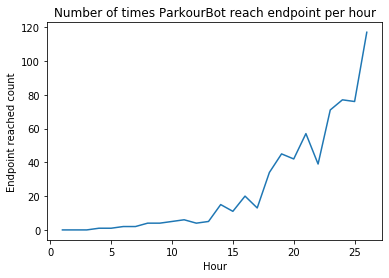

In [96]:
import sys
import time
import json
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint

X = np.genfromtxt('returns_26 hour_eval.txt', delimiter=None)
print(X.shape)

t = np.trunc(X.shape[0]/26)
t = t.astype(int)

res = np.array([])
part = np.array([])

for i in range(0, 26):
    count = 0
    total = 0
    for j in range(0, t):
        if (X[i*t+j,1] > 500):
            count = count + 1
    tmp = np.array([count])
    res = np.concatenate((res, tmp), axis = None)
    part_tmp = np.array([i+1])
    part = np.concatenate((part, part_tmp), axis = None)

plt.clf()
plt.plot(part, res)
plt.title('Number of times ParkourBot reach endpoint per hour')
plt.ylabel('Endpoint reached count')
plt.xlabel('Hour')
plt.savefig('returns_endpoints_count.png')

with open('returns_endpoints_count.txt', 'w') as f:
    for step, value in zip(part, res):
        f.write("{}\t{}\n".format(step, value))
    
for i in range(0, X.shape[0]):
    if (X[i,1] > 500):
        X[i,1] = X[i,1] - 900

box = np.ones(10) / 10
returns_smooth = np.convolve(X[:,1], box, mode='same')
plt.clf()
plt.plot(X[:,0], returns_smooth)
plt.title('ParkourBot')
plt.ylabel('Return')
plt.xlabel('Steps')
plt.savefig('returns_26 hour_graph.png')

with open('returns_26 hour_text.txt', 'w') as f:
    for step, value in zip(X[:,0], X[:,1]):
        f.write("{}\t{}\n".format(step, value))